In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_boston

raw_data = load_boston()
print(raw_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
df = pd.DataFrame(raw_data.data, columns=raw_data.feature_names)
df["PRICE"] = raw_data.target
display(df)

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  PRICE  
0       15.3  396.90   4.98   24.0  
1       17.8  396.90   9.14   21.6  
2       17.8  392.83   4.03   34.7  
3       18.7  394.63   2.94   33.4  
4       18.7  396.90   5.33   36.2  
..       ...     ...    ...    ...  
501     21.0  391.99   9.67   22.4  
502     21.0  396.90   9.08   20.6  
503     21.0  396.90   5.64   23.9  
504     21.0  393.45   6.48   22.0  
505     21.0  396.90   7.88   11.9  

[506 rows x 14 columns]

# Binning & Smooting

Data içinde bulunan "DIS" değişkeninde Evin Bostondaki iş merkezlerine uzaklığı ağırlıklı olarak hesaplanmış. Bu değişkeni farklı yöntemler kullanarak Ayrıklaştırmak istiyoruz.  

[]

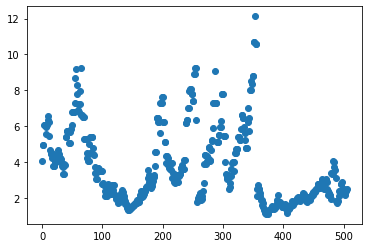

In [4]:
# Bu scatterplotı Ayrıklaştırma işlemi yapıldıktan sonraki hali ile karşılaştırabilirsiniz
DIS = df.DIS
x = np.arange(len(DIS))
plt.scatter(x, DIS)
plt.plot()

<AxesSubplot:>

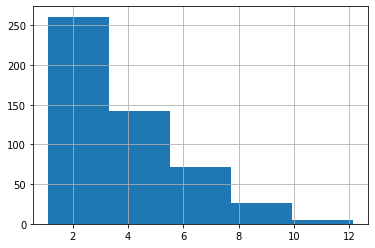

In [5]:
df.DIS.hist(bins=5)

In [6]:
series_DIS, bins = pd.cut(df.DIS, bins=5, retbins=True, labels=[0,1,2,3,4])
series_DIS.value_counts()

0    261
1    142
2     72
3     26
4      5
Name: DIS, dtype: int64

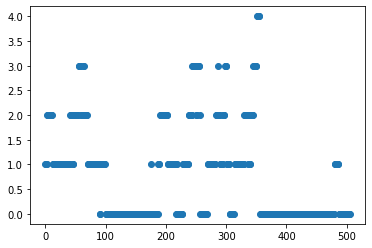

In [7]:
plt.scatter(np.arange(len(df.DIS)), series_DIS)

In [ ]:
Gürültülerinden kurtulduğumuz için daha kolay yorum yapabiliyoruz.

### Soru

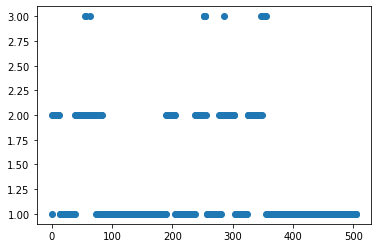

In [32]:
 # y değişkeninin için pd.cut fonksiyonunu kullanarak df.DIS 'ın ayrıklaştırılmış hali ile doldurun 
 # NOT: bins parametresi için "3", labels için "[0,1,2]" ve retbins için "True" değerlerini kullanın
new_DIS, bins = pd.cut(df.DIS, bins = 3,retbins = True, labels =[1,2,3])
x = np.arange(len(new_DIS))
plt.scatter(x, new_DIS)

<b>pd.cut</b> fonksiyonu, değişkeni ayrıklaştırırken aşağıdaki stratejilerden hangisini kullandı?<br>
-- Equal-frequency(Eşit frekans)<br>
-- Equal-width (eşit aralıklar)

IPUCU: değişkenin min-max değerlerini ve value_count dağılımlarını kontrol edebilirsiniz.

In [36]:
print("Min:", df.DIS.min(),"Max:", df.DIS.max())
print("Sınır değerleri:", bins)
print("\n Ayrık değerlerin görülme sayısı")
print(new_DIS.value_counts(), "\n\n")

print("Equal-width ")

Min: 1.1296 Max: 12.1265
Sınır değerleri: [  0.         168.33333333 336.66666667 505.        ]

 Ayrık değerlerin görülme sayısı
0    169
1    168
2    169
dtype: int64 


Equal-width 


### Soru 

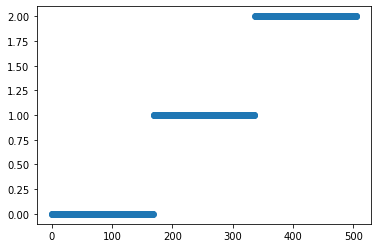

In [34]:
 # aynı işlemi pd.qcut kullanarak yapın
# NOT: q parametresi için "3", labels için "[0,1,2]" ve retbins için "True" değerlerini kullanın
new_DIS, bins = pd.qcut(x, q=3, retbins = True, labels= [0,1,2])
x = np.arange(len(new_DIS))
plt.scatter(x, new_DIS)

<b>pd.qcut</b> fonksiyonu, değişkeni ayrıklaştırırken aşağıdaki stratejilerden hangisini kullandı?<br>
-- Equal-frequency(Eşit frekans)<br>
-- Equal-width (eşit aralıklar)

IPUCU: değişkenin min-max değerlerini ve value_count dağılımlarını kontrol edebilirsiniz.

In [37]:
print("Min:", df.DIS.min(),"Max:", df.DIS.max())
print("Sınır değerleri:", bins)
print("\n Ayrık değerlerin görülme sayısı")
print(new_DIS.value_counts(), "\n\n")

print(" Equal-frequency(Eşit frekans)")

Min: 1.1296 Max: 12.1265
Sınır değerleri: [  0.         168.33333333 336.66666667 505.        ]

 Ayrık değerlerin görülme sayısı
0    169
1    168
2    169
dtype: int64 


 Equal-frequency(Eşit frekans)


# Feature Generation

Bu bölümde var olan değişkenlerden yeni değişkenler üretelim.

In [8]:
# seçtiğiniz iki değişkenin toplamından yeni bir değişken üretin
df["AGE+DIS"] = df.AGE+df.DIS
df["AGE+DIS"]

0      69.2900
1      83.8671
2      66.0671
3      51.8622
4      60.2622
        ...   
501    71.5786
502    78.9875
503    93.1675
504    91.6889
505    83.3050
Name: AGE+DIS, Length: 506, dtype: float64

In [9]:
# seçtiğiniz iki değişkenin farkından yeni bir değişken üretin
df["AGE-DIS"] = df.AGE-df.DIS
df["AGE-DIS"]

0      61.1100
1      73.9329
2      56.1329
3      39.7378
4      48.1378
        ...   
501    66.6214
502    74.4125
503    88.8325
504    86.9111
505    78.2950
Name: AGE-DIS, Length: 506, dtype: float64

In [10]:
# seçtiğiniz iki değişkenin bölümünden yeni bir değişken üretin
df["AGE/DIS"] = df.AGE/df.DIS
df["AGE/DIS"]

0      15.941320
1      15.884520
2      12.300940
3       7.555013
4       8.940649
         ...    
501    27.878641
502    33.530055
503    41.983852
504    37.381221
505    32.255489
Name: AGE/DIS, Length: 506, dtype: float64

In [11]:
# seçtiğiniz iki değişkenin çarpımından yeni bir değişken üretin
df["AGE*DIS"] = df.AGE*df.DIS
df["AGE*DIS"]

0      266.66800
1      391.90419
2      303.48981
3      277.64876
4      328.57124
         ...    
501    171.27126
502    175.45125
503    197.24250
504    213.32877
505    202.40400
Name: AGE*DIS, Length: 506, dtype: float64

sklearn kütüphanesindeki PolynomialFeatures'ı kullanarak yeni featurelar üretin (NOT:Hedef değişkeni(PRICE) yeni featureları üretirken kullanmayın.)

In [13]:
# PolynomialFeatures kullandığınız python kodunu buraya yazabilirsiniz.
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=1, interaction_only=True)
pd.DataFrame(poly.fit_transform(df))

0        1     2      3    4      5      6     7       8    9      10  \
0    1.0  0.00632  18.0   2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    1.0  0.02731   0.0   7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    1.0  0.02729   0.0   7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    1.0  0.03237   0.0   2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    1.0  0.06905   0.0   2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..   ...      ...   ...    ...  ...    ...    ...   ...     ...  ...    ...   
501  1.0  0.06263   0.0  11.93  0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  1.0  0.04527   0.0  11.93  0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  1.0  0.06076   0.0  11.93  0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  1.0  0.10959   0.0  11.93  0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  1.0  0.04741   0.0  11.93  0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

       11      12    13    14       15       16         17         18  
0    15.3  396.90  4.98  24.0  69.2900  61.1100  15.941320  266.66800  
1    17.8  396.90  9.14  21.6  83.8671  73.9329  15.884520  391.90419  
2    17.8  392.83  4.03  34.7  66.0671  56.1329  12.300940  303.48981  
3    18.7  394.63  2.94  33.4  51.8622  39.7378   7.555013  277.64876  
4    18.7  396.90  5.33  36.2  60.2622  48.1378   8.940649  328.57124  
..    ...     ...   ...   ...      ...      ...        ...        ...  
501  21.0  391.99  9.67  22.4  71.5786  66.6214  27.878641  171.27126  
502  21.0  396.90  9.08  20.6  78.9875  74.4125  33.530055  175.45125  
503  21.0  396.90  5.64  23.9  93.1675  88.8325  41.983852  197.24250  
504  21.0  393.45  6.48  22.0  91.6889  86.9111  37.381221  213.32877  
505  21.0  396.90  7.88  11.9  83.3050  78.2950  32.255489  202.40400  

[506 rows x 19 columns]

# Normalizasyon

In [15]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler


sklearn kütüphanesindeki Min-max scalerı kullanarak datayı normalize edip yeni bir dataframe içine atayın 

In [25]:
mms = MinMaxScaler()
display(df.head(4))
norm_data = mms.fit_transform(df)
pd.DataFrame(norm_data, columns=[df]).head(4)

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  AGE+DIS  AGE-DIS    AGE/DIS    AGE*DIS  
0     15.3  396.90   4.98   24.0  69.2900  61.1100  15.941320  266.66800  
1     17.8  396.90   9.14   21.6  83.8671  73.9329  15.884520  391.90419  
2     17.8  392.83   4.03   34.7  66.0671  56.1329  12.300940  303.48981  
3     18.7  394.63   2.94   33.4  51.8622  39.7378   7.555013  277.64876

CRIM    ZN     INDUS CHAS       NOX        RM       AGE       DIS  \
0  0.000000  0.18  0.067815  0.0  0.314815  0.577505  0.641607  0.269203   
1  0.000236  0.00  0.242302  0.0  0.172840  0.547998  0.782698  0.348962   
2  0.000236  0.00  0.242302  0.0  0.172840  0.694386  0.599382  0.348962   
3  0.000293  0.00  0.063050  0.0  0.150206  0.658555  0.441813  0.448545   

        RAD       TAX   PTRATIO         B     LSTAT     PRICE   AGE+DIS  \
0  0.000000  0.208015  0.287234  1.000000  0.089680  0.422222  0.622495   
1  0.043478  0.104962  0.553191  1.000000  0.204470  0.368889  0.772063   
2  0.043478  0.104962  0.553191  0.989737  0.063466  0.660000  0.589426   
3  0.086957  0.066794  0.648936  0.994276  0.033389  0.631111  0.443677   

    AGE-DIS   AGE/DIS   AGE*DIS  
0  0.628722  0.176507  0.402439  
1  0.754827  0.175857  0.603976  
2  0.579775  0.134875  0.461694  
3  0.418539  0.080601  0.420110

sklearn kütüphanesindeki StandardScalerı kullanarak datayı standardize edip yeni bir dataframe içine atayın 

In [18]:
std = StandardScaler()
display(df.head(4))
norm_data = std.fit_transform(df)
pd.DataFrame(norm_data, columns=[df]).head(4)

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  AGE+DIS  AGE-DIS    AGE/DIS    AGE*DIS  
0     15.3  396.90   4.98   24.0  69.2900  61.1100  15.941320  266.66800  
1     17.8  396.90   9.14   21.6  83.8671  73.9329  15.884520  391.90419  
2     17.8  392.83   4.03   34.7  66.0671  56.1329  12.300940  303.48981  
3     18.7  394.63   2.94   33.4  51.8622  39.7378   7.555013  277.64876

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   

        DIS       RAD       TAX   PTRATIO         B     LSTAT     PRICE  \
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686   
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524   
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247   
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758   

    AGE+DIS   AGE-DIS   AGE/DIS   AGE*DIS  
0 -0.115855 -0.123452 -0.558664  0.524542  
1  0.432476  0.307902 -0.561351  1.821129  
2 -0.237087 -0.290878 -0.730894  0.905763  
3 -0.771418 -0.842398 -0.955429  0.638228

sklearn kütüphanesindeki RobustScalerı kullanarak datayı standardize edip yeni bir dataframe içine atayın 

In [19]:
rbs = RobustScaler()
display(df.head(4))
norm_data = rbs.fit_transform(df)
pd.DataFrame(norm_data, columns=[df]).head(4)

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  AGE+DIS  AGE-DIS    AGE/DIS    AGE*DIS  
0     15.3  396.90   4.98   24.0  69.2900  61.1100  15.941320  266.66800  
1     17.8  396.90   9.14   21.6  83.8671  73.9329  15.884520  391.90419  
2     17.8  392.83   4.03   34.7  66.0671  56.1329  12.300940  303.48981  
3     18.7  394.63   2.94   33.4  51.8622  39.7378   7.555013  277.64876

CRIM    ZN     INDUS CHAS       NOX        RM       AGE       DIS  \
0 -0.069593  1.44 -0.571650  0.0  0.000000  0.496612 -0.250765  0.285777   
1 -0.063755  0.00 -0.202943  0.0 -0.394286  0.287940  0.028542  0.569789   
2 -0.063760  0.00 -0.202943  0.0 -0.394286  1.323171 -0.334353  0.569789   
3 -0.062347  0.00 -0.581720  0.0 -0.457143  1.069783 -0.646279  0.924391   

    RAD       TAX   PTRATIO         B     LSTAT     PRICE   AGE+DIS   AGE-DIS  \
0 -0.20 -0.087855 -1.339286  0.261902 -0.637681  0.351097 -0.243451 -0.242935   
1 -0.15 -0.227390 -0.446429  0.261902 -0.221889  0.050157  0.070055  0.001697   
2 -0.15 -0.227390 -0.446429  0.066675 -0.732634  1.692790 -0.312765 -0.337887   
3 -0.10 -0.279070 -0.125000  0.153016 -0.841579  1.529781 -0.618266 -0.650668   

    AGE/DIS   AGE*DIS  
0 -0.209842  0.786082  
1 -0.211437  2.254423  
2 -0.312058  1.217802  
3 -0.445315  0.914827

# Correlation & Covariance

Bu hücrede değişkenlerin birbiri ile olan korelasyonları heatmap kullanarak görselleştirildi.<br>
Aşağıdaki sorular bu görseli incelemeye ve yorumlamaya yönelik olacaktır.


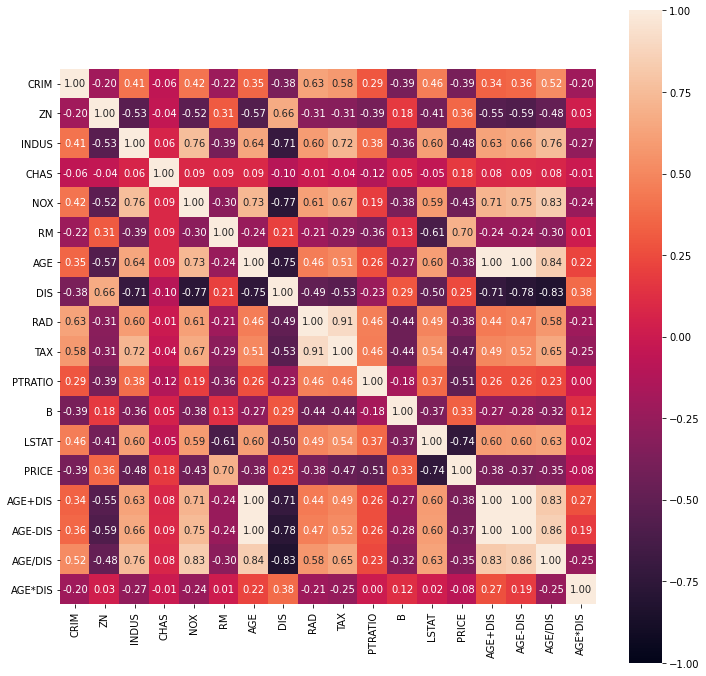

In [20]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), vmin=-1, vmax=1, square=True, annot=True, fmt='.2f')
plt.show()

Aşağıda örnek iki değişken için scatter plot çizilmiştir.

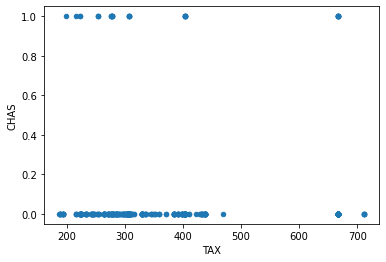

In [21]:
df.plot.scatter("TAX","CHAS")
plt.show()
# scatter plot çizerken buradan kopya çekebilirsiniz :)

Yukarıdaki heatmapten birbiri ile pozitif yüksek korelasyona sahip iki değişken için scatter plot çiziniz. Bir iki cümle ile görseli yorumlamaya çalışınız. Not:Yorum yaparken değişkenlerin yukarıdaki açıklamalarından faydalanabilirsiniz.

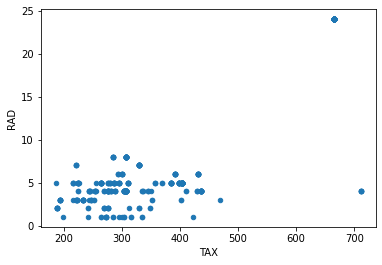

RAD otoyollara erişilebilirlik indexi ve TAX 10 bin dolar başına tam değer emlak vergisi oranıymış. İkisinin değerlerinin tabloda aynı bölgelerde yığılması çok normal çünkü rahatlıkla bu iki özelliğin birbiriyle doğru orantılı olduğunu söyleyebiliriz. Bir şeyin vergisi yüksekse o şey pahalıdır ve iyi bir şeydir. Yine aynı şekilde bir evin otoyollara erişebilme kolaylığı o evin pahalı ve iyi bir ev olduğunu gösterir


In [24]:
df.plot.scatter("TAX","RAD")
plt.show()

print("RAD otoyollara erişilebilirlik indexi ve TAX 10 bin dolar başına tam değer emlak vergisi oranıymış. İkisinin değerlerinin tabloda aynı bölgelerde yığılması çok normal çünkü rahatlıkla bu iki özelliğin birbiriyle doğru orantılı olduğunu söyleyebiliriz. Bir şeyin vergisi yüksekse o şey pahalıdır ve iyi bir şeydir. Yine aynı şekilde bir evin otoyollara erişebilme kolaylığı o evin pahalı ve iyi bir ev olduğunu gösterir")

Heatmapten faydalanarak negatif korelasyonlu iki değişken için scatter plot çiziniz. Sonucu yorumlayınız

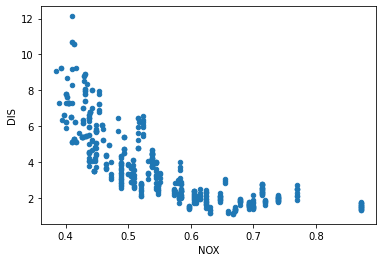

Yorumunuzu bu print içine yazabilirsiniz


In [28]:
df.plot.scatter("NOX","DIS")
plt.show()
print("İkisinin çok alakasız olduğunu tablodan anlayabiliyoruz. Zaten biri nitrik asit kontrasyonu, diğeri ise Boston merkezine ağırlıklı mesafeler.)

Heatmapten faydalanarak düşük korelasyonlu iki değişken için scatter plot çiziniz. Sonucu yorumlayınız.

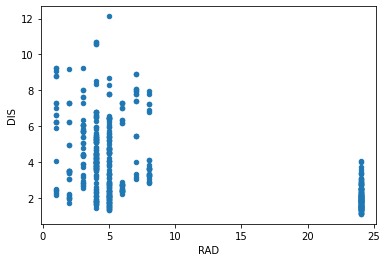

Yorumunuzu bu print içine yazabilirsiniz


In [30]:
df.plot.scatter("RAD","DIS")
plt.show()
print("Otoyollara erişilebilirlik indexi ve Boston istihdam merkezine ağırlıklı mesafeler birbiriyle alakalı değil. Tablodan da bunu anlayabiliyoruz.")

### Soru

<b>Adım 1 :</b>df.cov() methodunu kullanarak datasetteki covariance değerlerini hesaplayın.<br> 
sns.heatmap ile bu methodu görselleştirin (IPUCU: Yukarıda korelasyon gösteriminde kullanılan yöntemin aynısı)
heatmap için vmin ve vmax parametrelerini kullanmayın.

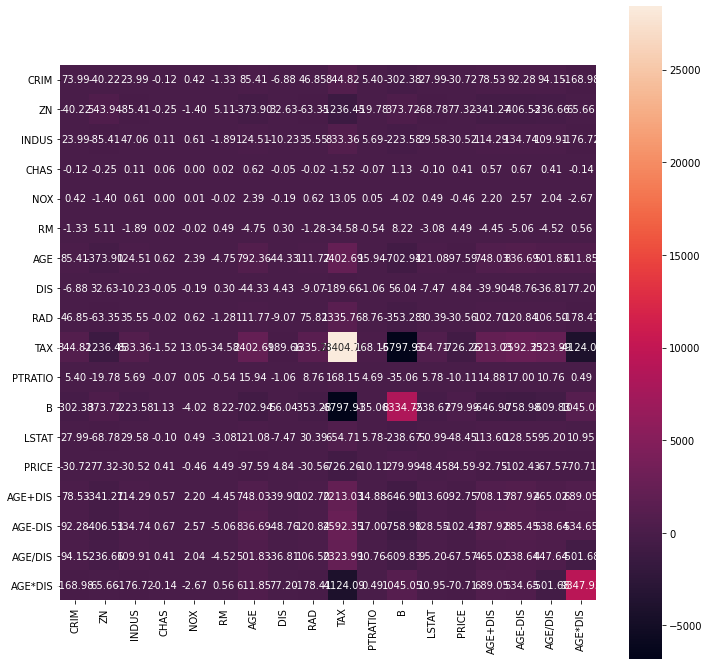

In [31]:
plt.figure(figsize=(12,12))
sns.heatmap(df.cov(), square=True, annot=True, fmt='.2f')
plt.show()

# Bilgi: Kovaryans değerinden anlam çıkartmak korelasyona göre daha zor çıkan grafikten bunu farkedebilirsiniz.

<b>Adım 2 :</b> Şimdi sklearn.preprocessing paketi içindeki StandardScaler objesini kullanarak datayı standardize edin ve bunu ayrı bir dataframede tutun. Standardize edilmiş dataframe objesinin Kovaryans değerini tekrar hesaplatıp görselleştirin.

<br>IPUCU : standardScalerdan gelen dönüştürülmüş datayı tekrar pandas DataFrame objesine çevirin ve bunu yaparken kolon adlarını kaybetmemeye çalışın örn: pd.DataFrame(standardize_numpy_datası, columns=df.columns)

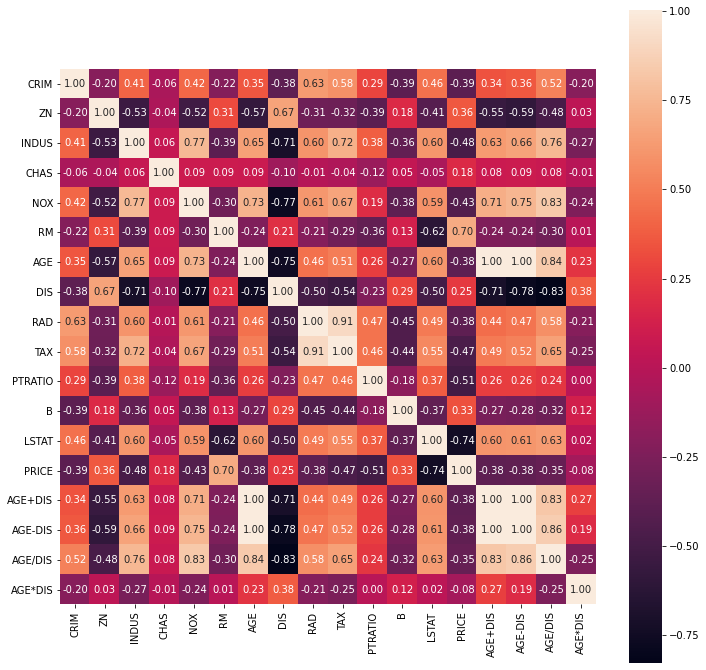

In [38]:
from sklearn.preprocessing import StandardScaler
scaledf = StandardScaler().fit_transform(df.values)
scaledf_df = pd.DataFrame(scaledf, index=df.index, columns=df.columns)

plt.figure(figsize=(12,12))
sns.heatmap(scaledf_df.cov(), square=True, annot=True, fmt='.2f')
plt.show()



# Bilgi: Ortaya çıkan grafik korelasyon grafiğine benziyor mu? :)